In [1]:
import pandas as pd
filepath = ('heart.csv')
data = pd.read_csv(filepath)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [2]:
data.head(1).T

,0
age,52.0
sex,1.0
cp,0.0
trestbps,125.0
chol,212.0
fbs,0.0
restecg,1.0
thalach,168.0
exang,0.0
oldpeak,1.0


In [3]:
data.drop(['fbs'], axis=1, inplace=True)

In [4]:
data.head(2)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,0,155,1,3.1,0,0,3,0


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['target']:
    data[col] = lb.fit_transform(data[col])

In [7]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)

In [10]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'target']

# Split the data into two dataframes
X_data = data[x_cols]
y_data = data['target']

In [11]:
X_data

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.000000,0.292453,0.196347,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.000000,0.433962,0.175799,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.000000,0.481132,0.109589,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.000000,0.509434,0.175799,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.000000,0.415094,0.383562,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667


In [12]:
y_data

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1020    1.0
1021    0.0
1022    0.0
1023    1.0
1024    0.0
Name: target, Length: 1025, dtype: float64

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data.values)

In [14]:
def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])

In [15]:
print(accuracy(y_data, y_pred))

1.0


In [16]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data.values)

print(accuracy(y_data, y_pred))

1.0


In [17]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data.values)

print(accuracy(y_data, y_pred))

1.0


In [18]:
score_list = list()

for k in range(1, 21):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data)

    y_pred = knn.predict(X_data.values)
    score = accuracy(y_data, y_pred)

    score_list.append((k, score))

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

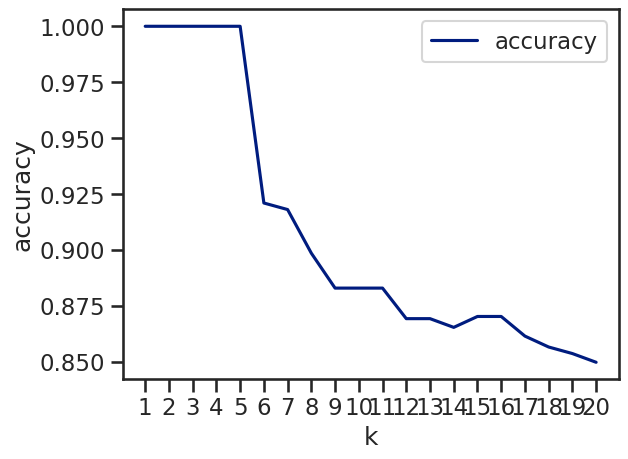

In [20]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));